In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
import sklearn.pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
tree = pd.read_csv(r'/Users/eugenekim/Downloads/new_york_tree_census_2015.csv')
tree

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,606945,305778,2016-06-28,10,0,OnCurb,Alive,Good,Fraxinus pennsylvanica,green ash,...,25,14,QN37,Kew Gardens Hills,4125700,New York,40.724339,-73.805180,1.038250e+06,203232.9417
1,160321,341273,2015-08-19,9,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,34,13,QN28,Jackson Heights,4030902,New York,40.756626,-73.894167,1.013571e+06,214953.6472
2,541347,325281,2015-12-30,7,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,32,10,QN76,Baisley Park,4028800,New York,40.679777,-73.788463,1.042923e+06,187008.2671
3,613930,203822,2016-07-05,10,0,OnCurb,Alive,Good,Pyrus calleryana,Callery pear,...,46,22,BK31,Bay Ridge,3005000,New York,40.622743,-74.037543,9.738279e+05,166160.5847
4,18353,338911,2015-06-13,4,0,OnCurb,Alive,Good,Prunus virginiana,'Schubert' chokecherry,...,31,10,QN12,Hammels-Arverne-Edgemere,4095400,New York,40.596514,-73.797622,1.040452e+06,156667.5017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,237788,223344,2015-09-19,2,0,OnCurb,Alive,Poor,Prunus cerasifera,purple-leaf plum,...,51,25,BK33,Carroll Gardens-Columbia Street-Red Hook,3005300,New York,40.672566,-74.011473,9.810674e+05,184310.4162
683784,249489,335314,2015-09-23,2,0,OnCurb,Dead,NaN,NaN,NaN,...,33,11,QN44,Glen Oaks-Floral Park-New Hyde Park,4157903,New York,40.730434,-73.710600,1.064458e+06,205525.7957
683785,230261,230303,2015-09-16,2,0,OnCurb,Dead,NaN,NaN,NaN,...,44,17,BK42,Flatbush,3048200,New York,40.633890,-73.969779,9.926380e+05,170220.9185
683786,623784,318368,2016-07-12,18,0,OnCurb,Alive,Good,Quercus rubra,northern red oak,...,31,10,QN55,South Ozone Park,4017800,New York,40.676190,-73.813135,1.036082e+06,185685.7796


In [3]:
tree.describe()

,tree_id,block_id,tree_dbh,stump_diam,zipcode,cb_num,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,6.837880e+05,683788.000000,683788.000000,6.837880e+05,683788.000000
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,3.404914e+06,40.701261,-73.924060,1.005280e+06,194798.424625
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,1.175863e+06,0.090311,0.123583,3.428505e+04,32902.061114
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631928,-73.980500,9.896578e+05,169515.153700
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.252500
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834910,1.029991e+06,217019.571950
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100


In [4]:
tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude',
       'longitude', 'x_sp', 'y_sp'],
      dtype='object')

In [5]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   tree_id     683788 non-null  int64  
 1   block_id    683788 non-null  int64  
 2   created_at  683788 non-null  object 
 3   tree_dbh    683788 non-null  int64  
 4   stump_diam  683788 non-null  int64  
 5   curb_loc    683788 non-null  object 
 6   status      683788 non-null  object 
 7   health      652172 non-null  object 
 8   spc_latin   652169 non-null  object 
 9   spc_common  652169 non-null  object 
 10  steward     652173 non-null  object 
 11  guards      652172 non-null  object 
 12  sidewalk    652172 non-null  object 
 13  user_type   683788 non-null  object 
 14  problems    652124 non-null  object 
 15  root_stone  683788 non-null  object 
 16  root_grate  683788 non-null  object 
 17  root_other  683788 non-null  object 
 18  trunk_wire  683788 non-null  object 
 19  tr

In [6]:
tree.groupby(['boroname']).count()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
boroname,,,,,,,,,,,,,,,,,,,,,
Bronx,85203,85203,85203,85203,85203,85203,85203,80585,80584,80584,...,85203,85203,85203,85203,85203,85203,85203,85203,85203,85203
Brooklyn,177293,177293,177293,177293,177293,177293,177293,169744,169744,169744,...,177293,177293,177293,177293,177293,177293,177293,177293,177293,177293
Manhattan,65423,65423,65423,65423,65423,65423,65423,62427,62428,62428,...,65423,65423,65423,65423,65423,65423,65423,65423,65423,65423
Queens,250551,250551,250551,250551,250551,250551,250551,237974,237970,237970,...,250551,250551,250551,250551,250551,250551,250551,250551,250551,250551
Staten Island,105318,105318,105318,105318,105318,105318,105318,101442,101443,101443,...,105318,105318,105318,105318,105318,105318,105318,105318,105318,105318


In [7]:
def column_extracter(data):
    important_col = []
    for i in [0,3,5,7,9,10,11,12,13,14,29,37,38]:
        important_col = important_col + [data.columns[i]]
    return data.loc[:, important_col]
tree = column_extracter(tree)
tree

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,boroname,latitude,longitude
0,606945,10,OnCurb,Good,green ash,None,None,NoDamage,TreesCount Staff,Stones,Queens,40.724339,-73.805180
1,160321,9,OnCurb,Good,honeylocust,None,None,NoDamage,Volunteer,BranchLights,Queens,40.756626,-73.894167
2,541347,7,OnCurb,Good,Callery pear,None,None,NoDamage,TreesCount Staff,BranchLights,Queens,40.679777,-73.788463
3,613930,10,OnCurb,Good,Callery pear,None,None,NoDamage,TreesCount Staff,None,Brooklyn,40.622743,-74.037543
4,18353,4,OnCurb,Good,'Schubert' chokecherry,None,None,NoDamage,TreesCount Staff,BranchLights,Queens,40.596514,-73.797622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,237788,2,OnCurb,Poor,purple-leaf plum,1or2,None,NoDamage,TreesCount Staff,None,Brooklyn,40.672566,-74.011473
683784,249489,2,OnCurb,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,Queens,40.730434,-73.710600
683785,230261,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,Brooklyn,40.633890,-73.969779
683786,623784,18,OnCurb,Good,northern red oak,None,None,Damage,NYC Parks Staff,None,Queens,40.676190,-73.813135


In [8]:
tree = tree.set_index('tree_id')
tree

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,boroname,latitude,longitude
tree_id,,,,,,,,,,,,
606945,10,OnCurb,Good,green ash,None,None,NoDamage,TreesCount Staff,Stones,Queens,40.724339,-73.805180
160321,9,OnCurb,Good,honeylocust,None,None,NoDamage,Volunteer,BranchLights,Queens,40.756626,-73.894167
541347,7,OnCurb,Good,Callery pear,None,None,NoDamage,TreesCount Staff,BranchLights,Queens,40.679777,-73.788463
613930,10,OnCurb,Good,Callery pear,None,None,NoDamage,TreesCount Staff,None,Brooklyn,40.622743,-74.037543
18353,4,OnCurb,Good,'Schubert' chokecherry,None,None,NoDamage,TreesCount Staff,BranchLights,Queens,40.596514,-73.797622
...,...,...,...,...,...,...,...,...,...,...,...,...
237788,2,OnCurb,Poor,purple-leaf plum,1or2,None,NoDamage,TreesCount Staff,None,Brooklyn,40.672566,-74.011473
249489,2,OnCurb,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,Queens,40.730434,-73.710600
230261,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,Brooklyn,40.633890,-73.969779


In [9]:
tree.groupby('boroname').count()

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
boroname,,,,,,,,,,,
Bronx,85203,85203,80585,80584,80585,80585,80585,85203,80583,85203,85203
Brooklyn,177293,177293,169744,169744,169744,169744,169743,177293,169734,177293,177293
Manhattan,65423,65423,62427,62428,62427,62427,62427,65423,62422,65423,65423
Queens,250551,250551,237974,237970,237974,237973,237974,250551,237967,250551,250551
Staten Island,105318,105318,101442,101443,101443,101443,101443,105318,101418,105318,105318


In [10]:
tree = tree[tree['boroname'] == 'Bronx'].drop(columns= ['boroname'])
tree

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_id,,,,,,,,,,,
413812,5,OnCurb,Good,American elm,None,None,Damage,TreesCount Staff,None,40.808967,-73.882647
341736,12,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.848221,-73.786963
235893,9,OnCurb,Good,sweetgum,None,None,Damage,TreesCount Staff,None,40.839470,-73.825995
555711,2,OnCurb,Fair,Japanese snowbell,None,None,Damage,TreesCount Staff,None,40.861374,-73.896356
468628,6,OnCurb,Good,white ash,None,None,Damage,TreesCount Staff,None,40.825079,-73.898917
...,...,...,...,...,...,...,...,...,...,...,...
353312,5,OnCurb,Good,maple,None,None,NoDamage,NYC Parks Staff,None,40.855549,-73.913975
496225,4,OnCurb,Good,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,None,40.822946,-73.880646
404699,14,OnCurb,Good,honeylocust,1or2,None,NoDamage,NYC Parks Staff,None,40.814814,-73.903676


In [11]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85203 entries, 413812 to 447656
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tree_dbh    85203 non-null  int64  
 1   curb_loc    85203 non-null  object 
 2   health      80585 non-null  object 
 3   spc_common  80584 non-null  object 
 4   steward     80585 non-null  object 
 5   guards      80585 non-null  object 
 6   sidewalk    80585 non-null  object 
 7   user_type   85203 non-null  object 
 8   problems    80583 non-null  object 
 9   latitude    85203 non-null  float64
 10  longitude   85203 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 7.8+ MB


In [12]:
import matplotlib.pyplot as plt

In [13]:
tree['user_type'].value_counts()

TreesCount Staff    47329
NYC Parks Staff     24653
Volunteer           13221
Name: user_type, dtype: int64

<AxesSubplot:>

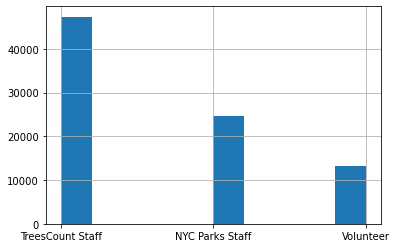

In [14]:
tree['user_type'].hist()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(tree, tree['health'], test_size=0.2, random_state=42, stratify=tree['user_type'])

In [16]:
tree['user_type'].value_counts() / tree.shape[0]

TreesCount Staff    0.555485
NYC Parks Staff     0.289344
Volunteer           0.155171
Name: user_type, dtype: float64

In [17]:
X_train['user_type'].value_counts() / X_train.shape[0]

TreesCount Staff    0.555485
NYC Parks Staff     0.289340
Volunteer           0.155174
Name: user_type, dtype: float64

<AxesSubplot:>

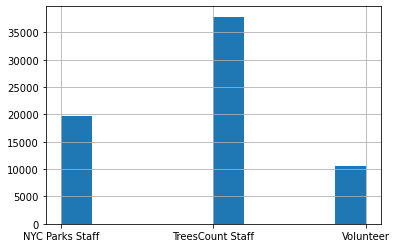

In [18]:
X_train['user_type'].hist()

In [19]:
X_train

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_id,,,,,,,,,,,
346935,6,OnCurb,Good,purple-leaf plum,None,None,NoDamage,NYC Parks Staff,None,40.872506,-73.855672
490195,5,OnCurb,Good,Sophora,None,None,NoDamage,TreesCount Staff,None,40.886091,-73.905778
200898,18,OnCurb,Good,Norway maple,None,None,NoDamage,TreesCount Staff,None,40.904388,-73.845547
367507,8,OnCurb,Good,Sophora,None,None,NoDamage,NYC Parks Staff,BranchLights,40.863540,-73.861512
44696,2,OnCurb,Good,sycamore maple,1or2,None,NoDamage,TreesCount Staff,None,40.883782,-73.893817
...,...,...,...,...,...,...,...,...,...,...,...
494644,29,OffsetFromCurb,Good,mulberry,None,None,NoDamage,TreesCount Staff,None,40.881941,-73.896121
242663,16,OnCurb,Good,Japanese zelkova,None,None,Damage,TreesCount Staff,Stones,40.897056,-73.856535
350651,36,OnCurb,Poor,London planetree,None,None,NoDamage,NYC Parks Staff,TrunkOther,40.859261,-73.912426


In [20]:
y_train

tree_id
346935    Good
490195    Good
200898    Good
367507    Good
44696     Good
          ... 
494644    Good
242663    Good
350651    Poor
56118     Good
374076    Good
Name: health, Length: 68162, dtype: object

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

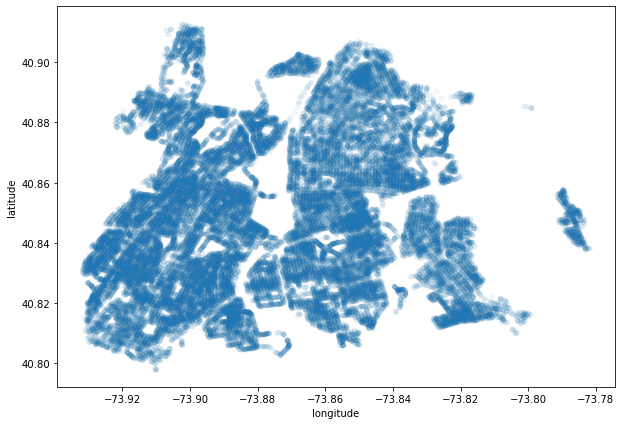

In [21]:
X_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.05, figsize=(10,7))

In [22]:
X_train.sort_values(by='health', ascending = False)

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_id,,,,,,,,,,,
92345,3,OnCurb,Poor,cherry,None,None,NoDamage,Volunteer,Stones,40.812776,-73.922066
214,4,OnCurb,Poor,hedge maple,None,None,Damage,TreesCount Staff,None,40.826118,-73.898813
323339,4,OnCurb,Poor,purple-leaf plum,None,None,NoDamage,NYC Parks Staff,None,40.838601,-73.922915
444241,9,OnCurb,Poor,littleleaf linden,None,None,NoDamage,NYC Parks Staff,TrunkOther,40.821837,-73.929056
433259,4,OffsetFromCurb,Poor,red maple,None,None,Damage,TreesCount Staff,None,40.821943,-73.857741
...,...,...,...,...,...,...,...,...,...,...,...
500961,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.822291,-73.849935
227689,11,OnCurb,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,40.884798,-73.899389
502085,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.834347,-73.866841


In [23]:
X_train[pd.isnull(X_train['health'])]

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_id,,,,,,,,,,,
31441,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.883428,-73.882862
473856,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.857242,-73.899277
392565,0,OnCurb,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,40.851219,-73.860840
244297,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.855498,-73.850902
404480,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.848359,-73.831472
...,...,...,...,...,...,...,...,...,...,...,...
500961,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.822291,-73.849935
227689,11,OnCurb,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,40.884798,-73.899389
502085,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.834347,-73.866841


In [24]:
X_train[pd.isnull(X_train['problems'])]

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_id,,,,,,,,,,,
31441,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.883428,-73.882862
473856,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.857242,-73.899277
392565,0,OnCurb,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,40.851219,-73.860840
244297,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.855498,-73.850902
404480,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.848359,-73.831472
...,...,...,...,...,...,...,...,...,...,...,...
500961,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.822291,-73.849935
227689,11,OnCurb,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,40.884798,-73.899389
502085,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.834347,-73.866841


In [25]:
X_train[pd.isnull(X_train['problems'])].sort_values(by='health')

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_id,,,,,,,,,,,
551578,3,OnCurb,Good,cherry,1or2,None,NoDamage,TreesCount Staff,NaN,40.863803,-73.833843
551579,3,OnCurb,Good,cherry,1or2,None,NoDamage,TreesCount Staff,NaN,40.863736,-73.833723
31441,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.883428,-73.882862
473856,2,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.857242,-73.899277
392565,0,OnCurb,NaN,NaN,NaN,NaN,NaN,NYC Parks Staff,NaN,40.851219,-73.860840
...,...,...,...,...,...,...,...,...,...,...,...
500961,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.822291,-73.849935
227689,11,OnCurb,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,40.884798,-73.899389
502085,0,OnCurb,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,40.834347,-73.866841


In [26]:
X_train.groupby('tree_dbh').count()

,curb_loc,health,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
tree_dbh,,,,,,,,,,
0,1695,21,21,21,21,21,1695,21,1695,1695
1,256,224,224,224,224,224,256,224,256,256
2,4850,4404,4404,4404,4404,4404,4850,4404,4850,4850
3,6901,6439,6438,6439,6439,6439,6901,6437,6901,6901
4,7959,7544,7544,7544,7544,7544,7959,7544,7959,7959
...,...,...,...,...,...,...,...,...,...,...
149,1,1,1,1,1,1,1,1,1,1
169,1,1,1,1,1,1,1,1,1,1
204,1,1,1,1,1,1,1,1,1,1


In [27]:
X_train.groupby('health').count()

,tree_dbh,curb_loc,spc_common,steward,guards,sidewalk,user_type,problems,latitude,longitude
health,,,,,,,,,,
Fair,8702,8702,8702,8702,8702,8702,8702,8702,8702,8702
Good,53289,53289,53288,53289,53289,53289,53289,53287,53289,53289
Poor,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476


In [28]:
sum(X_train['health'].isnull())

3695

In [29]:
label_data = pd.DataFrame(np.array([[8702], [53289], [2476], [3695]]), columns = ['health'])

<BarContainer object of 4 artists>

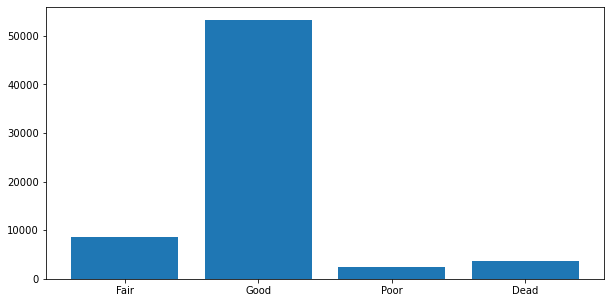

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.bar(['Fair','Good','Poor', 'Dead'], [8702, 53289, 2476, 3695])

In [31]:
distribution = list(zip(np.array(['Fair','Good','Poor', 'Dead']), np.array([8702, 53289, 2476, 3695])/68162))
distribution

[('Fair', 0.12766644171239108),
 ('Good', 0.7817992429799595),
 ('Poor', 0.03632522519879112),
 ('Dead', 0.054209090108858306)]

In [32]:
for i in distribution:
    print(i[0] + ' category is ' + str(i[1].round(2)) + '%')

Fair category is 0.13%
Good category is 0.78%
Poor category is 0.04%
Dead category is 0.05%


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68162 entries, 346935 to 374076
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tree_dbh    68162 non-null  int64  
 1   curb_loc    68162 non-null  object 
 2   health      64467 non-null  object 
 3   spc_common  64466 non-null  object 
 4   steward     64467 non-null  object 
 5   guards      64467 non-null  object 
 6   sidewalk    64467 non-null  object 
 7   user_type   68162 non-null  object 
 8   problems    64465 non-null  object 
 9   latitude    68162 non-null  float64
 10  longitude   68162 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.2+ MB


In [34]:
imputer_pre = pd.DataFrame(X_train['guards'].copy())
print('imputer_pre has ' + str(imputer_pre['guards'].isnull().sum()) + ' missing values')
print(imputer_pre.value_counts())
imputer_post = SimpleImputer(strategy = 'constant', fill_value = 'Unsure').fit_transform(imputer_pre)
print('imputer_post has ' + str(pd.DataFrame(imputer_post, columns = ['guards'])['guards'].isnull().sum()) + ' missing values')
print(pd.DataFrame(imputer_post, columns = ['guards']).value_counts())

imputer_pre has 3695 missing values
guards 
None       59641
Helpful     3638
Harmful      807
Unsure       381
dtype: int64
imputer_post has 0 missing values
guards 
None       59641
Unsure      4076
Helpful     3638
Harmful      807
dtype: int64


In [35]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X
    
outlier_remover = OutlierRemover()

array([[<AxesSubplot:title={'center':'tree_dbh'}>]], dtype=object)

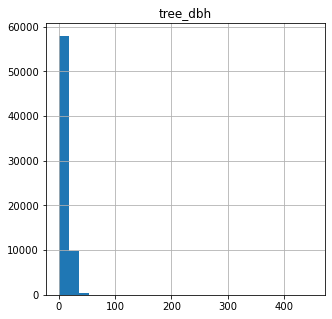

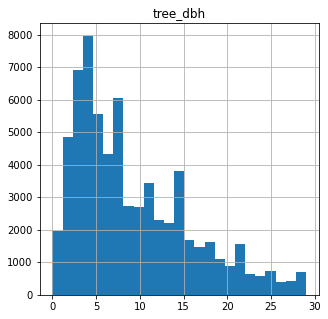

In [36]:
outlier_pre = pd.DataFrame(X_train['tree_dbh'].copy())
outlier_pre.hist(bins=25, figsize=(5,5))
outlier_post = outlier_remover.fit_transform(outlier_pre)
outlier_post.hist(bins=25, figsize=(5,5))

In [37]:
class BinaryConverter(BaseEstimator,TransformerMixin):
    def __init__(self, problems = True):
        self.problems = problems

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[x=='None'] = 0
            x[x!=0] = 1
            X.iloc[:,i] = x
        return X

binary_converter = BinaryConverter(problems = True)

In [38]:
binary_pre = pd.DataFrame(X_train['problems'].copy())
print('binary_pre has ' + str(binary_pre['problems'].value_counts().shape[0]) + ' different categories')
binary_post = binary_converter.fit_transform(binary_pre)
print('binary_post has ' + str(binary_post['problems'].value_counts().shape[0]) + ' different categories')

binary_pre has 126 different categories
binary_post has 2 different categories


In [39]:
class HealthNumerical(BaseEstimator,TransformerMixin):
    def __init__(self, health = True):
        self.health = health
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[x.isna()] = 0
            x[x=='Poor'] = 1
            x[x=='Fair'] = 2
            x[x=='Good'] = 3
            X.iloc[:,i] = x
        return X
health_numerical = HealthNumerical(health = True)

In [40]:
health_pre = pd.DataFrame(X_train['health'].copy())
print('health_pre is a ' + str(type(health_pre['health'].iloc[0])))
health_post = health_numerical.fit_transform(health_pre)
print('health_post is a ' + str(type(health_post['health'].iloc[0])))
print('health_post has ' + str(health_post['health'].value_counts().shape[0]) + ' categories')

health_pre is a <class 'str'>
health_post is a <class 'int'>
health_post has 4 categories


In [41]:
class StewardNumerical(BaseEstimator,TransformerMixin):
    def __init__(self, steward = True):
        self.steward = steward
    def fit(self,X, y=None):
        return self
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:,i].copy()
            x[x.isna()] = 0
            x[x == 'None']= 0
            x[x == '1or2'] = 1
            x[x == '3or4'] = 2
            x[x == '4orMore'] = 3
            X.iloc[:,i] = x
        return X
steward_numerical = StewardNumerical()

In [42]:
steward_pre = pd.DataFrame(X_train['steward'].copy())
print('steward_pre is a ' + str(type(steward_pre['steward'].iloc[0])))
steward_post = steward_numerical.fit_transform(steward_pre)
print('steward_post is a ' + str(type(steward_post['steward'].iloc[0])))
print('steward_post has ' + str(steward_post['steward'].value_counts().shape[0]) + ' categories')

steward_pre is a <class 'str'>
steward_post is a <class 'int'>
steward_post has 4 categories


In [43]:
num_pipeline = Pipeline([('outlier', outlier_remover), 
                         ('imputer', SimpleImputer(strategy = 'median')),
                         ('std_scaler', StandardScaler())])

In [44]:
oe_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NoDamage')),
                        ('ordinal', OrdinalEncoder(categories = 'auto')),
                        ('std_scaler', StandardScaler())])

In [45]:
steward_pipeline = Pipeline([('steward', steward_numerical), 
                             ('std_scaler', StandardScaler())])

In [46]:
health_pipeline = Pipeline([('health', health_numerical)])

In [47]:
prob_pipeline = Pipeline([('binary', binary_converter),
                          ('std_scaler', StandardScaler())])

In [48]:
one_hot_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unsure')),
                              ('one_hot', OneHotEncoder())])

In [49]:
X_train = X_train.drop(['health'], axis = 1)

In [60]:
num_attribs = ['tree_dbh', 'latitude', 'longitude']
oe_attribs = ['curb_loc', 'sidewalk']
steward_attribs = ['steward']
prob_attribs = ['problems']
one_hot_attribs = ['guards', 'user_type']
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), 
                                   ('oe', oe_pipeline, oe_attribs),
                                   ('steward', steward_pipeline, steward_attribs),
                                   ('prob', prob_pipeline, prob_attribs),
                                   ('one', one_hot_pipeline, one_hot_attribs)])
train_prepared = full_pipeline.fit_transform(X_train)
y_train = health_pipeline.fit_transform(y_train)['health'].astype('int')

In [61]:
train_prepared.shape[0]

68162

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()
rfc.fit(train_prepared, y_train)

RandomForestClassifier()

In [66]:
predictions = rfc.predict(train_prepared)

In [69]:
from sklearn.model_selection import cross_val_score
rfc_score = cross_val_score(rfc, train_prepared, y_train, cv=10)

In [70]:
rfc_score

array([0.82910371, 0.83101071, 0.83069249, 0.83245305, 0.82893192,
       0.82878521, 0.82673122, 0.82467723, 0.82819836, 0.82614437])